In [64]:
#imports
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [65]:
# reading data frames

states = gpd.read_file("C:/Users/Siddharth/Desktop/BITS/3 2/DM/project/india_telengana.shp")
rf_data=pd.read_csv(r'C:\Users\Siddharth\Desktop\BITS\3 2\DM\project\Sub_Division_IMD_2017.csv')

In [66]:
rf_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [67]:
rf_data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4
4187,Lakshadweep,2017,21.3,0.9,100.2,1.8,145.7,521.9,164.2,206.2,216.0,137.1,63.5,160.1,1738.9,22.2,247.8,1108.3,360.7


In [68]:
x = rf_data.SUBDIVISION
g=[]

for i in range(len(x)):
    if x[i] not in g:
        g.append(x[i])

In [16]:
l=[]
for i in range(len(g)):
    n=g[i]
    state=rf_data[rf_data.SUBDIVISION == n]
    l.append(state)

C:\Users\Siddharth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


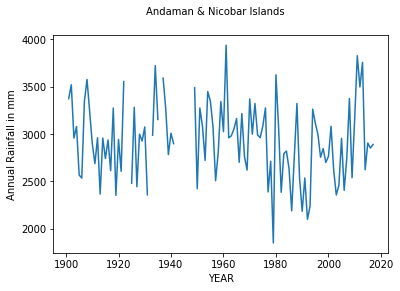

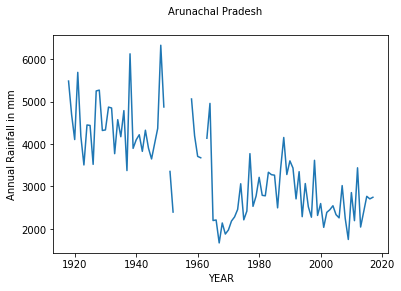

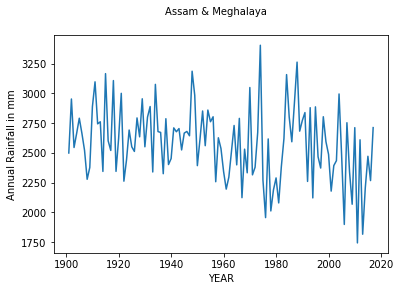

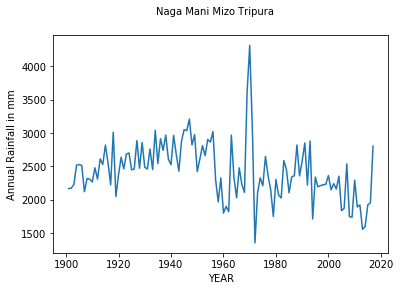

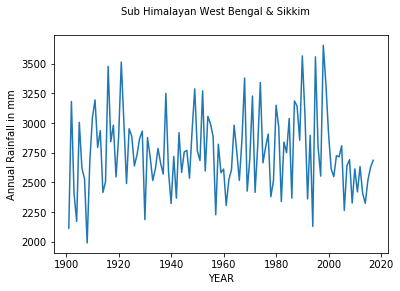

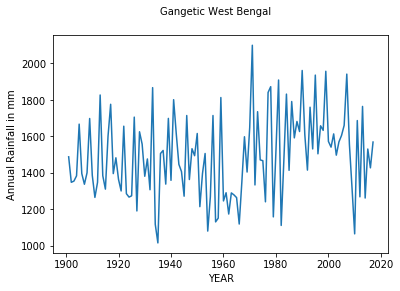

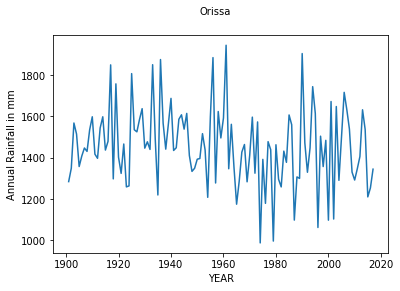

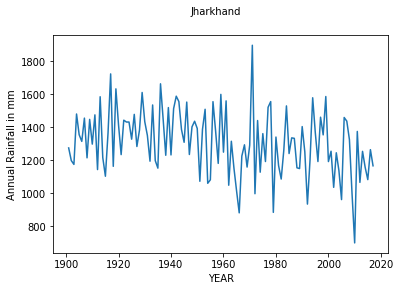

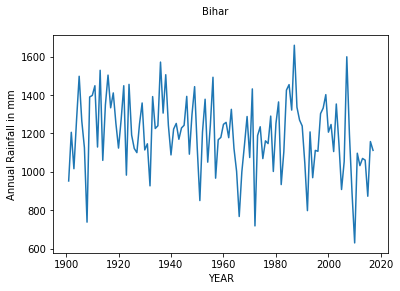

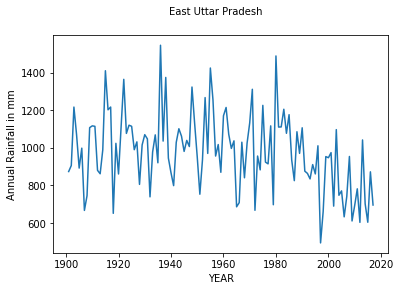

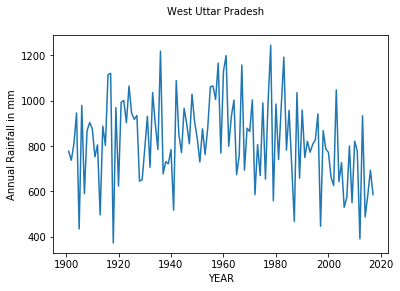

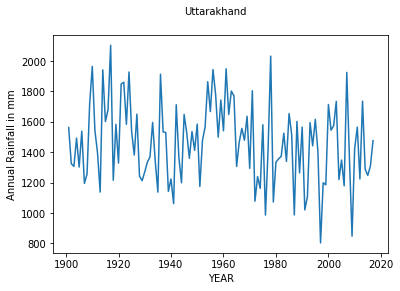

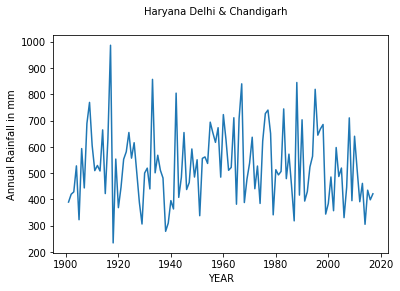

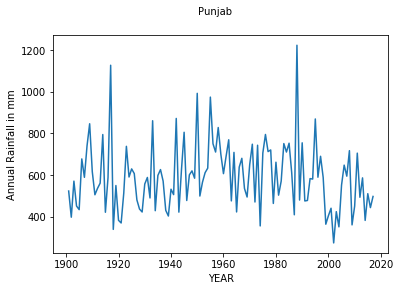

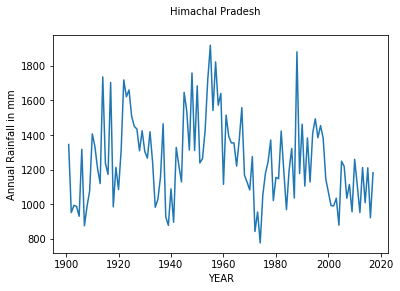

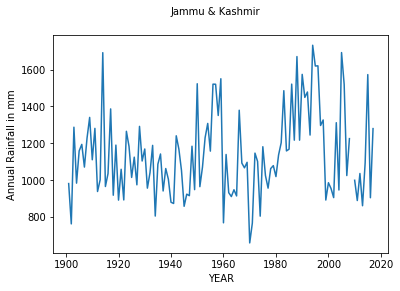

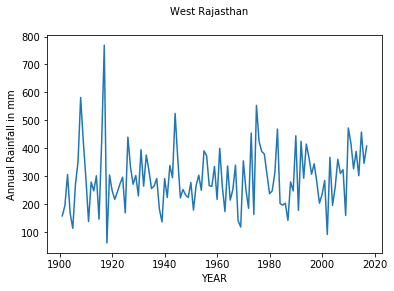

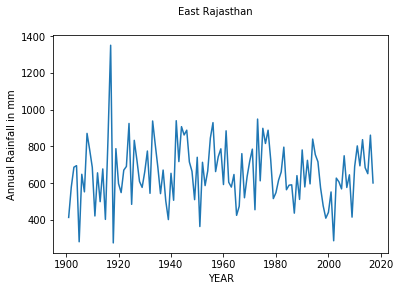

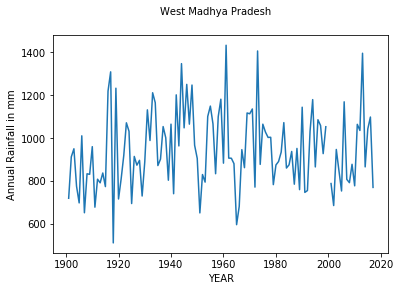

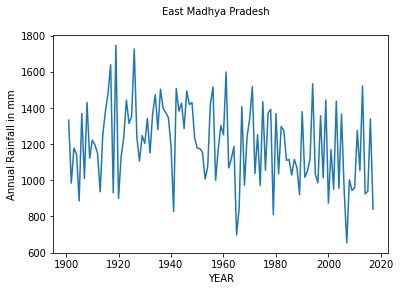

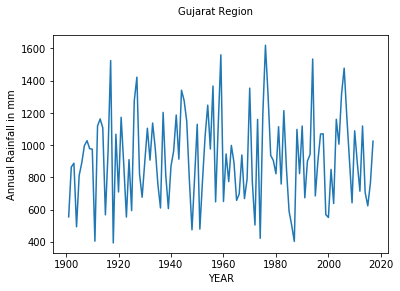

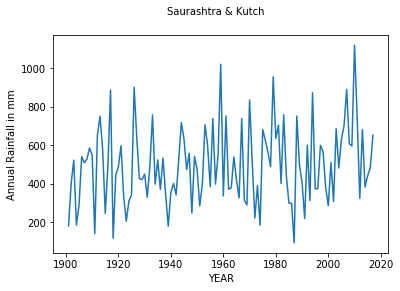

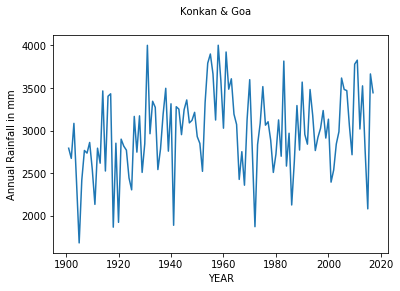

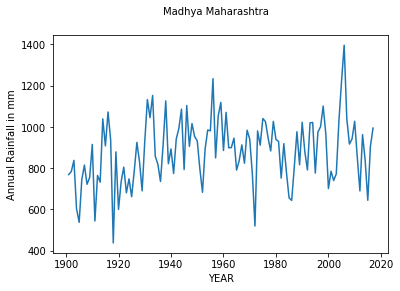

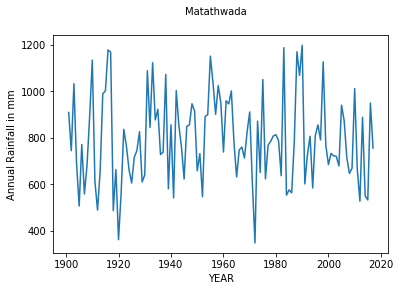

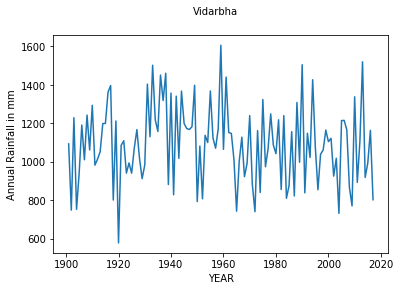

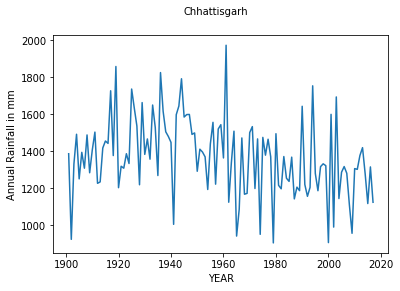

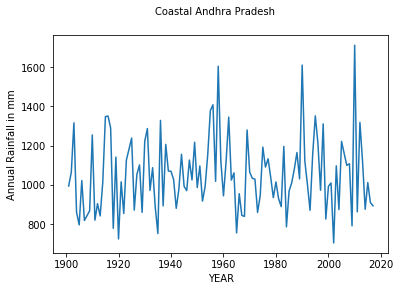

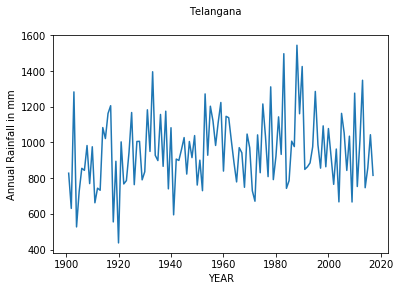

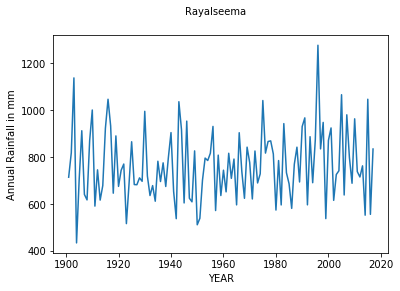

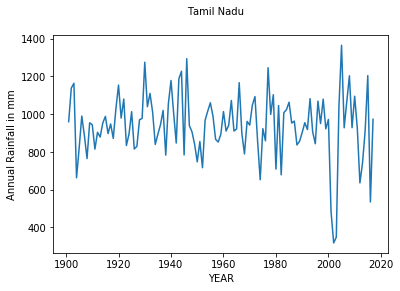

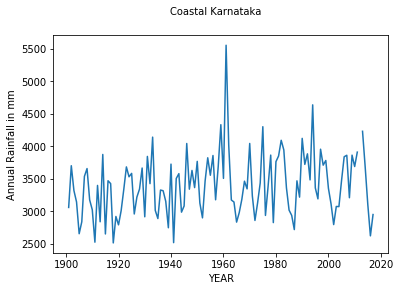

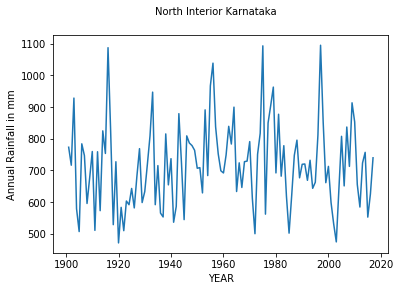

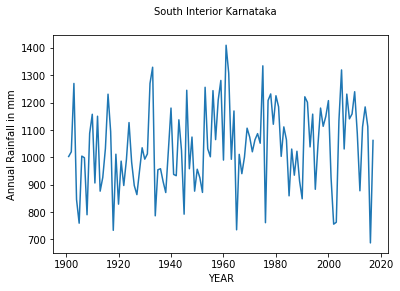

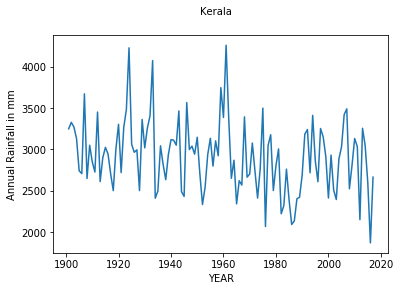

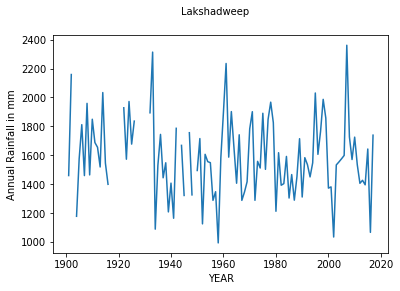

In [17]:

#plotting raw data
#rainfall in mm from 1900 to 2015, statewise
x=rf_data.SUBDIVISION
for i in range(len(g)):
    y=rf_data[x==g[i]]
    fig = plt.figure()
    fig.suptitle(g[i], fontsize=10)
    plt.plot(y.YEAR,y.ANNUAL)
    plt.xlabel('YEAR')
    plt.ylabel('Annual Rainfall in mm')


In [69]:

#remove all the rows with more than 2 or more quarters with NaN
c=0
rowlist=[]
col = ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']
rowlist1=pd.DataFrame(columns=['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND'])
for j in range(len(l)):
    for i in range(len(l[j])):
        for column in ['JF','MAM','JJAS','OND']:
            k=l[j].columns.get_loc(column)
            if np.isnan(l[j].iloc[i][k]):
                c+=1
        if c<2:
            rowlist.append(l[j].iloc[i])
        c=0
prelocalmean=rowlist1.append(rowlist, ignore_index=True)

In [70]:
#divide by states
p_states = [] #processed states, no Nan in quarters
for i in range(len(g)):
    n=g[i]
    s=prelocalmean[prelocalmean.SUBDIVISION==n]
    p_states.append(s)


In [71]:
#filling nans with mean values of the respective columns
lp=[]
for state in range(len(p_states)):
    h=p_states[state]    
    h=h.fillna(h.mean())
    lp.append(h)

In [72]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
lp[1].iloc[0]['JAN']
x=[]
sum=0

for i in range(len(lp)):
    for j in range(len(lp[i])):
        sum=0
        for k in months:
            sum+=lp[i].iloc[j][k]            
        x.append(sum)

df=pd.concat([lp[i] for i in range(len(lp))])
n=df.columns.get_loc('ANNUAL')
df=df.drop(['ANNUAL'],axis=1)
df['ANNUAL'] = x

col_values = []
x=[]
minmax=[]
na=[]

In [73]:
#Normalising Monthly rainfall
for i in range(len(lp)):
    df1=lp[i]
    for k in range(len(months)):
        a=min(df1[months[k]])
        b=max(df1[months[k]])
        n=lp[i].columns.get_loc(months[k])
        for j in range(len(df1[months[k]])):
            u = (lp[i].iloc[j][months[k]]-a)/(b -a)
            na.append(u)
        n=df1.columns.get_loc(months[k])
        df=df1.drop([months[k]],axis=1)
        df1[months[k]] = na
        lp[i]=df1
        na=[]

In [74]:
#Normalising Annual Rainfall
for i in range(len(lp)):
    df1=lp[i]
    a=min(lp[i].ANNUAL)
    b=max(lp[i].ANNUAL)
    n=lp[i].columns.get_loc('ANNUAL')
    for j in range(len(lp[i].ANNUAL)):
        u = (lp[i].iloc[j]['ANNUAL']-a)/(b -a)
        na.append(u)
    n=df1.columns.get_loc('ANNUAL')
    df=df1.drop(['ANNUAL'],axis=1)
    df1['ANNUAL'] = na
    lp[i]=df1
    na=[]

In [75]:
for i in range(len(lp)):
    print(lp[i].head())

                 SUBDIVISION  YEAR       JAN       FEB       MAR       APR  \
0  Andaman & Nicobar Islands  1901  0.084290  0.501151  0.107038  0.007119   
1  Andaman & Nicobar Islands  1902  0.000000  0.919448  0.044721  0.000000   
2  Andaman & Nicobar Islands  1903  0.021758  0.828539  0.000000  0.003095   
3  Andaman & Nicobar Islands  1904  0.016104  0.084580  0.000000  0.626431   
4  Andaman & Nicobar Islands  1905  0.002227  0.000000  0.012097  0.083256   

        MAY       JUN       JUL       AUG       SEP       OCT       NOV  \
0  0.512348  0.451396  0.366239  0.461146  0.277905  0.570949  0.855135   
1  0.421578  0.475392  0.210261  0.792132  0.727077  0.214246  0.536975   
2  0.189990  0.405362  0.782295  0.273677  0.286522  0.184412  0.417825   
3  0.266162  0.423972  0.523019  0.071394  0.934698  0.260861  0.456636   
4  0.238722  0.587537  0.370362  0.278290  0.229972  0.332650  0.004153   

        DEC    ANNUAL     JF    MAM    JJAS    OND  
0  0.053800  0.729510  136.

            SUBDIVISION  YEAR       JAN       FEB       MAR       APR  \
3599  Coastal Karnataka  1901  0.078261  0.020134  0.066295  0.475931   
3600  Coastal Karnataka  1902  0.139130  0.010067  0.030359  0.092643   
3601  Coastal Karnataka  1903  0.030435  0.000000  0.000000  0.037239   
3602  Coastal Karnataka  1904  0.104348  0.000000  0.029740  0.215259   
3603  Coastal Karnataka  1905  0.000000  0.006711  0.000000  0.058129   

           MAY       JUN       JUL       AUG       SEP       OCT       NOV  \
3599  0.105918  0.580945  0.408340  0.252229  0.080538  0.283929  0.411050   
3600  0.066850  0.306421  0.674092  0.135224  0.987761  0.462202  0.199060   
3601  0.281291  0.137105  0.676617  0.242543  0.377304  0.475893  0.310737   
3602  0.122703  0.734993  0.459367  0.143988  0.288002  0.303869  0.002743   
3603  0.108089  0.378477  0.269831  0.237239  0.178604  0.586607  0.141458   

           DEC    ANNUAL   JF    MAM    JJAS    OND  
3599  0.111389  0.179428  2.4  144.7  

C:\Users\Siddharth\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


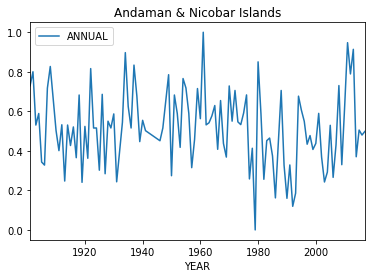

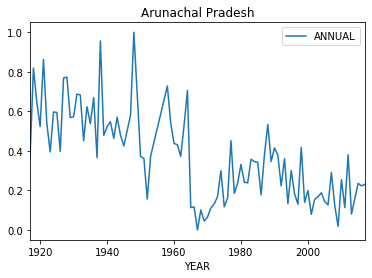

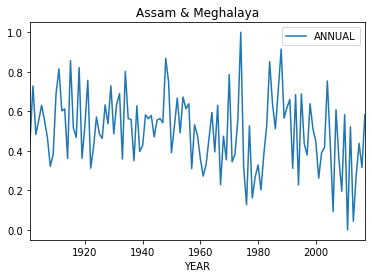

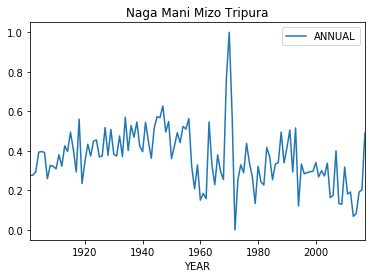

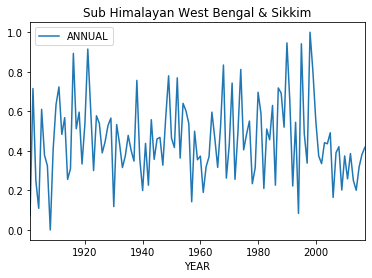

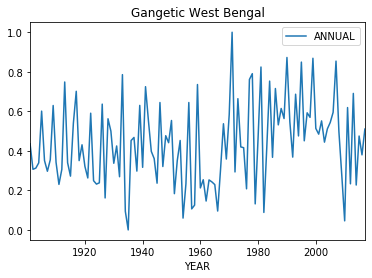

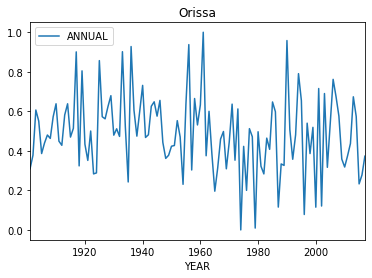

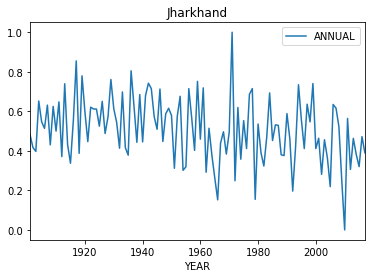

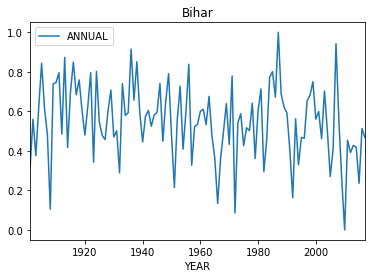

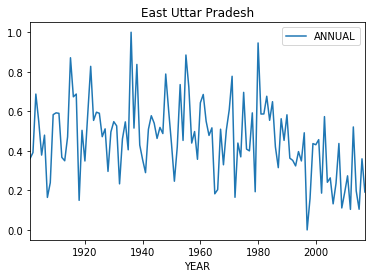

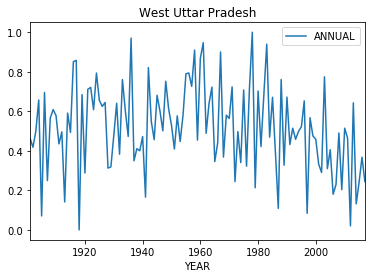

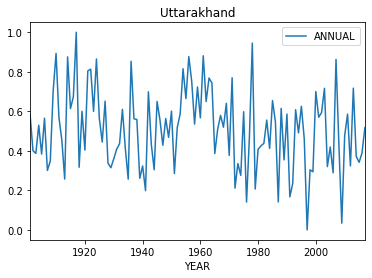

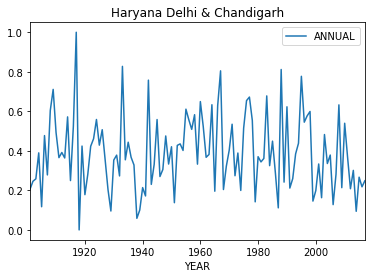

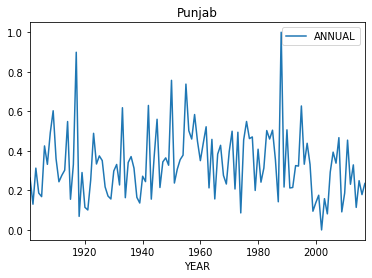

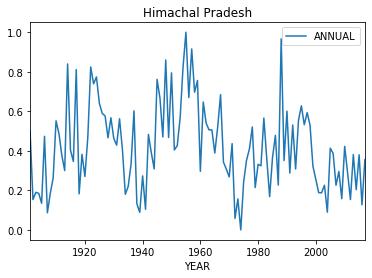

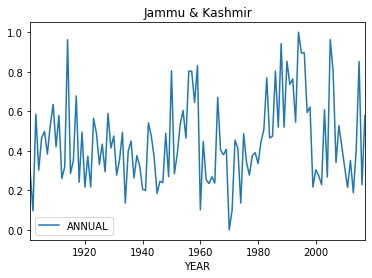

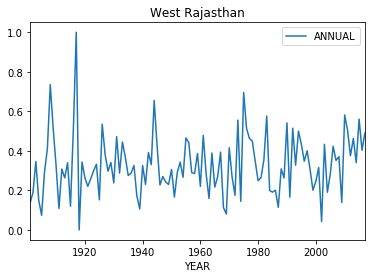

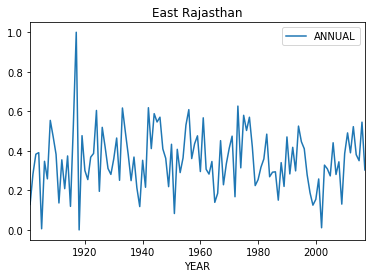

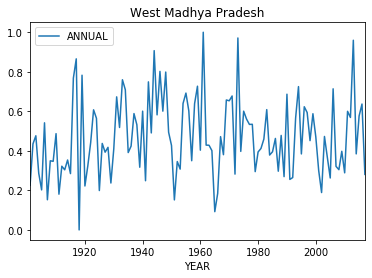

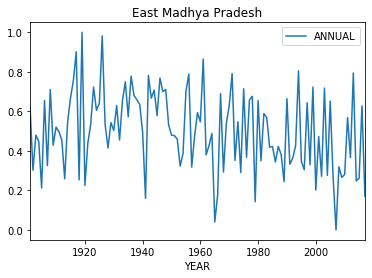

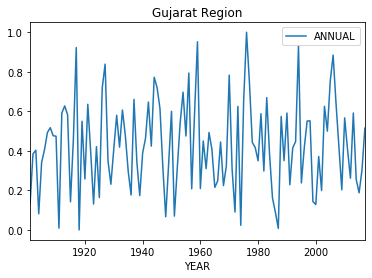

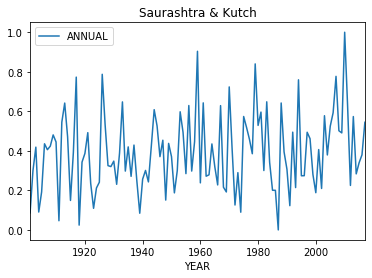

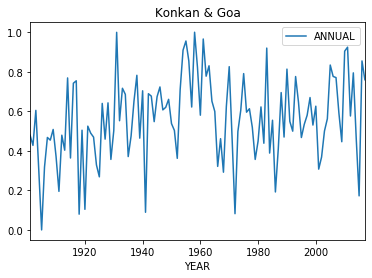

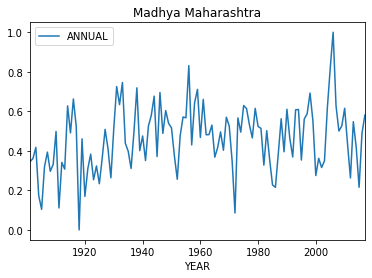

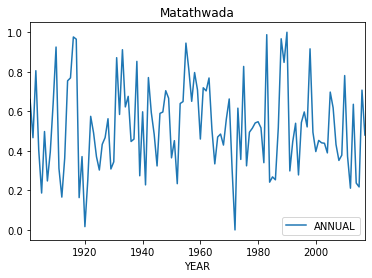

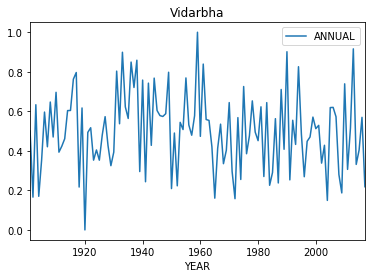

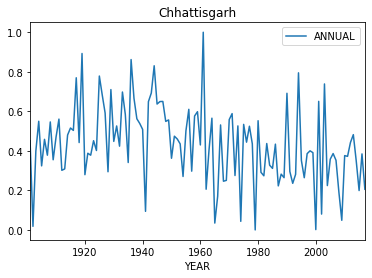

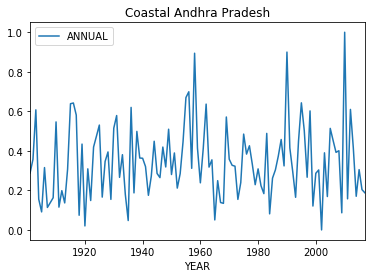

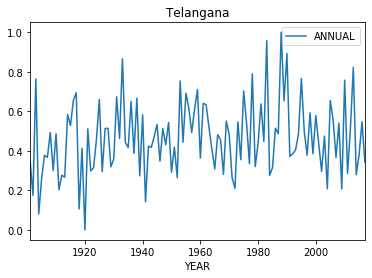

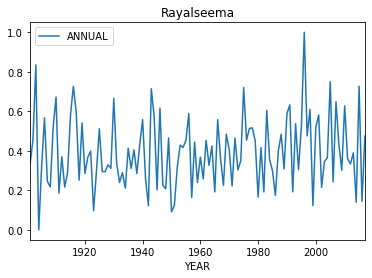

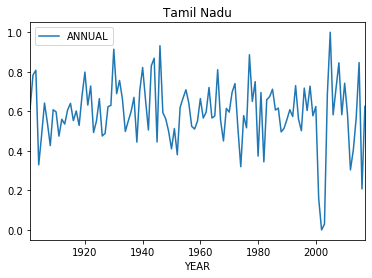

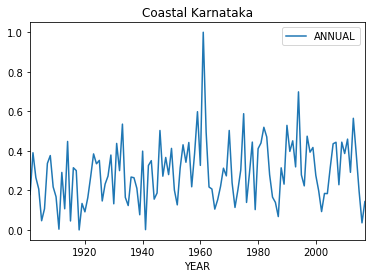

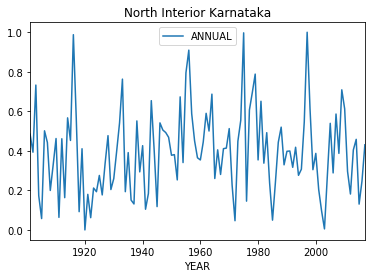

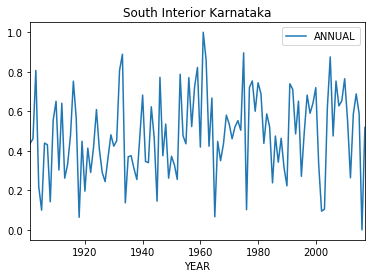

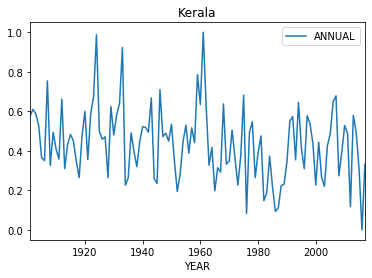

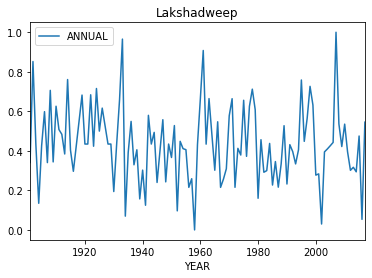

In [76]:
#plot annual rainfall per year for each state
for i in range(len(lp)):
    lp[i].plot('YEAR','ANNUAL', title=g[i])

# Getting Mean of Monthly and Annual Rainfall 
means_months = pd.DataFrame(columns=['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
means_months['SUBDIVISION']=g
for k in range(len(months)):
    mon=[]
    n=means_months.columns.get_loc(months[k])
    for i in range(len(lp)):
        df1=lp[i]
        mean=df1[months[k]].mean()
        mon.append(mean)
    means_months[months[k]]=mon
# Estimate Mean and standard deviation
means_annual = []
for i in range(len(lp)):
    df1=lp[i]
    mean=lp[i].ANNUAL.mean()
    means_annual.append(mean)

In [34]:
# Calculate Annual Standard Deviations

stdevs_annual = []
s=0;
for i in range(len(lp)):
    df1=lp[i]
    n=df1.columns.get_loc('ANNUAL')
    for j in range(len(lp[i].ANNUAL)):
        k=df1.iloc[j][n]
        variance=pow(k-means_annual[i],2) 
        s+=variance
    stdevs_annual.append(s)
    
stdevs_annual[i]
for i in range(len(stdevs_annual)):
    stdevs_annual[i]= [sqrt(stdevs_annual[i]/(float(len(lp[i])-1)))]

In [52]:
#Standard Deviations
stdevs_annual

[[0.19087752671327154],
 [0.30332973598536694],
 [0.3328939246036995],
 [0.3633884847800378],
 [0.4153158700157098],
 [0.4653511078128451],
 [0.5045036618583949],
 [0.530483756725441],
 [0.5625814713642976],
 [0.5949923526748793],
 [0.6334981204291841],
 [0.6648411999197891],
 [0.6910733816769995],
 [0.7120872355860571],
 [0.7442171427856752],
 [0.7785361265452464],
 [0.79025054020485],
 [0.8051758780746048],
 [0.828905629480686],
 [0.8531041530662729],
 [0.8823511876220742],
 [0.9037269484677635],
 [0.9278312072059144],
 [0.9424002191466573],
 [0.9679935762151163],
 [0.9880679793570359],
 [1.0074246059838303],
 [1.0248243507126211],
 [1.041348679517753],
 [1.0565141911401226],
 [1.0687503740052215],
 [1.0805080330065866],
 [1.1012978476891828],
 [1.121500594701698],
 [1.135896940743429],
 [1.171841717369903]]

In [58]:
#Plot Standard Deviation of Rainfall for all States


In [36]:

###VISUALIZATION


In [37]:
#create data frame of states and means of annual rainfall
annual_means = pd.DataFrame(columns=['SUBDIVISION', 'MEAN'])
annual_means['SUBDIVISION']=g #states
annual_means['MEAN']=means_annual #mean of annual rainfall 


In [38]:
#dictionary to map to states_on_geojson : meteorological regions
mydict = {"Andaman and Nicobar": ["Andaman & Nicobar Islands"],
"Telangana": ["Telangana"],
"Andhra Pradesh": ["Rayalseema", "Coastal Andhra Pradesh"],
"Arunachal Pradesh": ["Arunachal Pradesh"],
"Assam": ["Assam & Meghalaya"],
"Bihar": ["Bihar"],
"Chandigarh": ["Haryana Delhi & Chandigarh"],
"Chhattisgarh": ["Chhattisgarh"],
"Dadra and Nagar Haveli": [],
"Daman and Diu": [],
"Delhi": ["Haryana Delhi & Chandigarh"],
"Goa": ["Konkan & Goa"],
"Gujarat": ["Gujarat Region", "Saurashtra & Kutch"],
"Haryana": ["Haryana Delhi & Chandigarh"],
"Himachal Pradesh": ["Himachal Pradesh"],
"Jammu and Kashmir": ["Jammu & Kashmir"],
"Jharkhand": ["Jharkhand"],
"Karnataka": ["Coastal Karnataka", "North Interior Karnataka", "South Interior Karnataka"],
"Kerala": ["Kerala"],
"Lakshadweep": ["Lakshadweep"],
"Madhya Pradesh": ["East Madhya Pradesh", "West Madhya Pradesh"],
"Maharashtra": ["Madhya Maharashtra", "Matathwada", "Vidarbha"],
"Manipur": ["Naga Mani Mizo Tripura"],
"Meghalaya": ["Assam & Meghalaya"],
"Mizoram": ["Naga Mani Mizo Tripura"],
"Nagaland": ["Naga Mani Mizo Tripura"],
"Orissa" : ["Orissa"],
"Puducherry": [],"Punjab": ["Punjab"],
"Rajasthan": ["East Rajasthan", "West Rajasthan"],
"Sikkim": ["Sub Himalayan West Bengal & Sikkim"],
"Tamil Nadu": ["Tamil Nadu"],
"Tripura": ["Naga Mani Mizo Tripura"],
"Uttar Pradesh": ["East Uttar Pradesh", "West Uttar Pradesh"],
"Uttaranchal": ["Uttarakhand"],
"West Bengal": ["Gangetic West Bengal", "Sub Himalayan West Bengal & Sikkim"]
}

In [39]:
#create a list of means for the geojson states
plot_mean = []

#iterate through the dictionary, take average of multiple states in value array
for key, val in mydict.items():
    sumof = 0
    count=0
    for i in range(len(val)):
        reg = val[i]
        print (val[i])
        si=annual_means[annual_means.SUBDIVISION==reg]
        sumof+=si.iloc[0][1]
    if len(val)==0:
        plot_mean.append(0) #append the average values
    else:
        plot_mean.append(sumof/len(val)) #append the average values
        
states['MEANS']=plot_mean #add the average annual rainfall of all the years as a column

Andaman & Nicobar Islands
Telangana
Rayalseema
Coastal Andhra Pradesh
Arunachal Pradesh
Assam & Meghalaya
Bihar
Haryana Delhi & Chandigarh
Chhattisgarh
Haryana Delhi & Chandigarh
Konkan & Goa
Gujarat Region
Saurashtra & Kutch
Haryana Delhi & Chandigarh
Himachal Pradesh
Jammu & Kashmir
Jharkhand
Coastal Karnataka
North Interior Karnataka
South Interior Karnataka
Kerala
Lakshadweep
East Madhya Pradesh
West Madhya Pradesh
Madhya Maharashtra
Matathwada
Vidarbha
Naga Mani Mizo Tripura
Assam & Meghalaya
Naga Mani Mizo Tripura
Naga Mani Mizo Tripura
Orissa
Punjab
East Rajasthan
West Rajasthan
Sub Himalayan West Bengal & Sikkim
Tamil Nadu
Naga Mani Mizo Tripura
East Uttar Pradesh
West Uttar Pradesh
Uttarakhand
Gangetic West Bengal
Sub Himalayan West Bengal & Sikkim


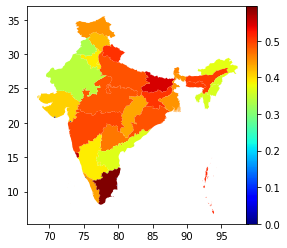

In [40]:
#plot the column on the map
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad=0.1)
states.plot(cmap='jet',column='MEANS',figsize=(10,10), ax=ax, legend=True, cax=cax)
make_axes_locatable(ax)